# Training Models

## Topics:
   * Linear Regression
       * Normal Equation
       * Gradient Descent
       * Batch Gradient Descent
       * Stochastic Gradient Descent
       * Mini-batch Gradient Descent
       * **Polynomial Regression**
       * Regularized Linear Models
           * *Ridge*
           * *Lasso*
           * *Elastic Net*
           * *Early Stopping*
   * Logistic Regression
   * Softmax Regression

**1. Linear Regression**

Linear Regression model prediction

$\hat{y}= \theta_{0} + \theta _{1}x_{1} +  \theta _{2}x_{2} + \cdot \cdot \cdot +\theta _{n}x_{n}$

Vectorized form

$\hat{y}= h_{\theta }(x) =  \theta \cdot x$

MSE cost function for a lineal regression model

$MSE(X,h_{\theta }) = \frac{1}{m}\sum_{1}^{m}(\theta ^{T}x^{(i)}-y^{(i)})^{2}$

**The Normal Equation**

There is _closed-form-solution_ that is a mathematical equation that gives the result directly but has a computational complexity about $O(n^{2.4})$ to $O(n^{3})$, so it`s usefull only in small datasets.

$\hat{\theta} = (X^{T}X)^{-1} X^{T}y$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)), X] #add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.60142754],
       [3.29498087]])

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add X0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.60142754],
       [10.19138928]])

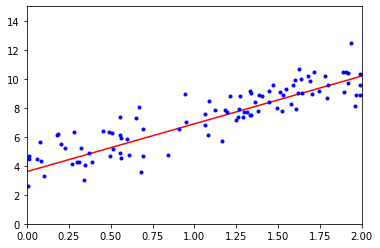

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# with Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.02399368]), array([[3.10699406]]))

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[ 7.73034704],
       [-0.39950841]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[ 7.73034704],
       [-0.39950841]])

**2. Gradient Descent**

To implement GD, we need to compute the gradient ot he cost function with regard to each model parameter $\theta_{j}$. In other words, calculate how much the cost function will change if we change the parameters just a little bit. (*Partial derivatives*)

$\frac{\partial }{\partial \theta _{j}}MSE(\theta ) = \frac{2}{m}\sum_{1}^{m}(\theta ^{T}x^{(i)}-y^{(i)})x_{j}^{(i)}$

$\theta ^{(next step)} = \theta - \eta \bigtriangledown _{\theta }MSE(\theta )$

In [10]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 1000

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[ 7.58970931],
       [-0.27054505]])

**Stochastic Gradient Descent**

Instead of using all the whole training set, SGD uses random instances to compute the gradients every step. 
    * Much less regular (implement simulated annealing to increase performance)
    * Faster

In [32]:
m=100
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m +i)
        theta = theta - eta*gradients
theta

array([[ 7.68918709],
       [-0.41212354]])

In [35]:
# with Scikit-Learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.04818522]), array([3.19256838]))

**Mini-batch Gradient Descent**

In this case we are going to use mini batches with random instances, not all the set (GD) nor single instances (SGD)

**3. Polynomial Regression**

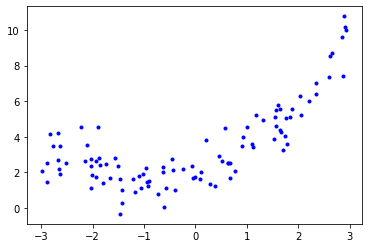

In [38]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X, y, "b.")
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_poly now contains the original feature of X plus the square of this feature. Now we can fit a *Linear regression* model to this extended training data

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97411313]), array([[0.96500968, 0.50976084]]))

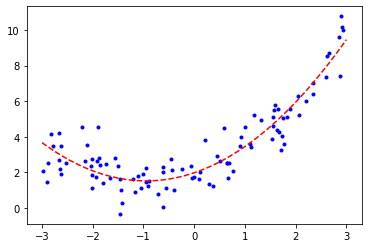

In [62]:
X_reg = np.linspace(-3,3,100)
y_reg = lin_reg.coef_[0][0]*X_reg + lin_reg.coef_[0][1]*X_reg**2 + lin_reg.intercept_[0]
plt.plot(X, y, "b.")
plt.plot(X_reg, y_reg, "r--")
plt.show()

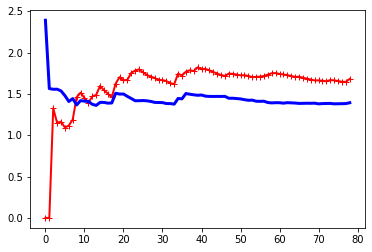

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3,label='val')

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

**4. Regularized Linear Models**

A good way to reduce overfitting is to regularized the model. The fewer degrees of freedom it has, the harder it will be for it to overfit the data. (reduce the number of polynomial degrees?)

For linear Models we have Ridge, Lasso and Elastic Net

**Ridge Regression**

Cost Function: $J(\theta )=MSE(\theta ) + \alpha \frac{1}{2}\sum_{1}^{n}\theta_{1}^{2} $

Closed-form solution: $\hat{\theta } = \left ( X^{T}X + \alpha A \right )^{-1} X^{T}y$

Its important to scale the data (Ridge is sensitive to the scale)

Remember that the Regularizarion its applied only on the training data

In [63]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.88348452]])

In [64]:
#Using SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.85421919])

**Lasso Regression**

Cost Function: $J(\theta )=MSE(\theta ) + \alpha \frac{1}{2}\sum_{1}^{n}\theta_{1} $


In [65]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.8347241])

**Elastic Net**

Cost Function: $J(\theta )=MSE(\theta ) + r\alpha\sum_{1}^{n}\theta_{1} + \frac{1-r}{2}\alpha\sum_{1}^{n}\theta_{1}^{2}$

It is always preferable to have a little bit of regularization. Ridge by default, Lasso when you suspect that only a few features are usefull. You will prefer Elastic Net whe Lasso doesnt performe well (when are more features than instances)

In [66]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.83781255])

**Early Stopping**

Look for: 
    * Why it works?
    * An implementation of it

**5. Logistic Regression**

Regression used for classification (binary).
Estimate the probability that an instance belongs to a certain class

$\hat{p} = h_{\theta }(x) = \sigma (x^{T}\theta )$

$\sigma (t) = \frac{1}{1+e^{(-t)}}$

$\hat{y} = \begin{Bmatrix}
 0 & if  & \hat{p}< 0.5 \\ 
 1 & if & \hat{p}>  0.5
\end{Bmatrix}$

*How is it trained?*

What is the *Cost Function* of a single instance?

$c(\theta ) = \begin{Bmatrix}
-log(\hat{p}) & if &y=1 \\ 
 -log(1-\hat{p})& if &y=0 
\end{Bmatrix}$

And over the whole training set?

$J(\theta )=-\frac{1}{m}\sum_{1}^{m}\left [ y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)}) \right ]$

Ant its partial derivatives

$\frac{\partial }{\partial \theta _{j}}J(\theta) = \frac{1}{m}\sum_{1}^{m}(\sigma(\theta ^{T}x^{(i)})-y^{(i)})x_{j}^{(i)}$

In [67]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [68]:
X = iris['data'][:,3:] #petal width
y = (iris['target']==2).astype(np.int)

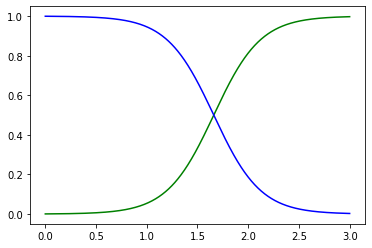

In [80]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label='Iris Virginica')
plt.plot(X_new, y_proba[:,0], "b-", label='Not Iris Virginica')

In [81]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

**6. Softmax Regression**

The **Logistic Regression** model can be generalized to support multiple classesdirectly, without having to train and combine multiple binary classifiers. This is called **Softmax Classifier**

In [83]:
X = iris["data"][:, (2,3)] #petal lenght, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
softmax_reg.predict([[5,2]])

array([2])

In [86]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])